# CIS545 Final Project

Our project is mainly focus on combining machine learning with data analysis tools to realize Chest X-ray image classification and meanwhile, to perform some statistical data analysis from the result of model training. We also want to obtain some deeper, non-intuitive data features and potential connections between labels. Since this is a multi-class and multi-label task, each image may belongs to one or more classes of the 14 pathologies.



We compare the performance of two models. One is our own CNN network, the other is a pretrained DenseNet121 network with fine tuning.



For exploratory data analysis, using csv file provided by dataset from kaggle, there are several part convering: data cleaning, key features extraction, endevaor on new visulization tool ...etc.  Mainly focus on the visulization 3 part: 14 diganosis  percentage, gender and age percentage and got diagnosis versus healthy people.

Note: This notebook is not all our work. Because we train the models, save and load them to train different sub-dataset, only part of plots and figures are shown in this notebook. We summarize the plots and figures in our submitted **report**.

# Step 0. Loading datasets

Since we trained our models on AWS, firstly, we use the following codes to down load Chest X-ray8 datasets from kaggle, and then unzip them. The whole datasets includes 12 subdatasets with more than 10000 images and a csv file for labels of all images.

In [ ]:
#before running this cell, first upload api tolen
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#whole datasets
!kaggle datasets download -d nih-chest-xrays/data #original 
!kaggle datasets download -d redwankarimsony/chestxray8-dataframe #includes bad labels


In [ ]:
# unzip subdataset
!unzip images_001.zip

Archive:  images_001.zip
   creating: images_001/
   creating: images_001/images/
 extracting: images_001/images/00000001_000.png  
 extracting: images_001/images/00000001_001.png  
 extracting: images_001/images/00000001_002.png  
 extracting: images_001/images/00000002_000.png  
 extracting: images_001/images/00000003_000.png  
 extracting: images_001/images/00000003_001.png  
 extracting: images_001/images/00000003_003.png  
 extracting: images_001/images/00000003_005.png  
 extracting: images_001/images/00000003_007.png  
 extracting: images_001/images/00000005_000.png  
 extracting: images_001/images/00000005_002.png  
 extracting: images_001/images/00000005_004.png  
 extracting: images_001/images/00000005_007.png  
 extracting: images_001/images/00000007_000.png  
 extracting: images_001/images/00000008_001.png  
  inflating: images_001/images/00000008_002.png  
 extracting: images_001/images/00000009_000.png  
 extracting: images_001/images/00000010_000.png  
 extracting: image

These are links for downloading from NIH website, we use this method to dowmload data before we use AWS.

In [ ]:
# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]


In [ ]:
#001
!wget https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz -O images_001.tar.gz
#004
!wget https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz -O images_004.tar.gz
#007
!wget https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz -O images_007.tar.gz
#010
!wget https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz -O images_010.tar.gz
#012
!wget https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz -O images_012.tar.gz

--2022-04-25 02:41:44--  https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Resolving nihcc.box.com (nihcc.box.com)... 107.152.25.197
Connecting to nihcc.box.com (nihcc.box.com)|107.152.25.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz [following]
--2022-04-25 02:41:44--  https://nihcc.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Reusing existing connection to nihcc.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nihcc.app.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz [following]
--2022-04-25 02:41:44--  https://nihcc.app.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Resolving nihcc.app.box.com (nihcc.app.box.com)... 107.152.25.201
Connecting to nihcc.app.box.com (nihcc.app.box.com)|107.152.25.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.

In [ ]:
#unzip subdatasets
!tar -xvf /content/images_001.tar.gz

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.utils import np_utils
from PIL import Image
sns.set()
from tqdm import tqdm

%matplotlib inline

# Step 1. Preprocessing

In this part, we will going to do some pre-work for our model trainning, including loading data, basic EDA and integration.

## 1.1 Loading original Labels 
Using pandas to load CSV file, and see what the original dataframe looks like. Display the first 10 rows of the dataframe in the cell below. The dataframe contains all useful and useless labels and information about each image. 



In [ ]:
#original labels
all_labels= pd.read_csv('Data_Entry_2017_v2020.csv')
all_labels.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168
5,00000003_002.png,Hernia,1,3,75,F,PA,2048,2500,0.168,0.168
6,00000003_003.png,Hernia|Infiltration,2,3,76,F,PA,2698,2991,0.143,0.143
7,00000003_004.png,Hernia,3,3,77,F,PA,2500,2048,0.168,0.168
8,00000003_005.png,Hernia,4,3,78,F,PA,2686,2991,0.143,0.143
9,00000003_006.png,Hernia,5,3,79,F,PA,2992,2991,0.143,0.143


In [ ]:
all_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.4+ MB


## 1.2 EDA and data prepossing




### 1.2.1 Droping useless data
1. Drop usless columns:

              "Follow-up #",

              "Patient Age",

              "Patient Gender",

              "View Position",

              "OriginalImage[Width","Height]",

              "OriginalImagePixelSpacing[x","y]"
              
2. To eliminate images without diagnosis labels, drop rows without labels

In [ ]:
#drop colums

all_labels_df=all_labels.copy()
all_labels_df.drop(["Follow-up #","Patient Age","Patient Gender","View Position",
"OriginalImage[Width","Height]","OriginalImagePixelSpacing[x","y]"], axis = 1,inplace=True)
all_labels_df.drop(all_labels_df[all_labels_df["Finding Labels"]=="No Finding"].index, inplace=True )
all_labels_df=all_labels_df.reset_index(drop=True)
all_labels_df

,Image Index,Finding Labels,Patient ID
0,00000001_000.png,Cardiomegaly,1
1,00000001_001.png,Cardiomegaly|Emphysema,1
2,00000001_002.png,Cardiomegaly|Effusion,1
3,00000003_001.png,Hernia,3
4,00000003_002.png,Hernia,3
...,...,...,...
51754,00030786_006.png,Consolidation,30786
51755,00030789_000.png,Infiltration,30789
51756,00030793_000.png,Mass|Nodule,30793
51757,00030795_000.png,Pleural_Thickening,30795


### 1.2.2  Encoding categorical features

  In order to facilitate the subsequent processing of labels, we need to encode labels (convert string labels to binary numbers).

  We set the new columns named as the class of original labels, and used binary values 0-1 to represent if this image index has this specific label.

In [ ]:
#multi-label encoding
all_labels_df["Finding Labels"]=all_labels_df["Finding Labels"].str.split("|")

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
#encoded data
encod=mlb.fit_transform(all_labels_df["Finding Labels"])

df = pd.DataFrame(encod, columns=list(mlb.classes_))
df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51754,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51755,0,0,0,0,0,0,0,0,1,0,0,0,0,0
51756,0,0,0,0,0,0,0,0,0,1,1,0,0,0
51757,0,0,0,0,0,0,0,0,0,0,0,1,0,0


 Conbine two dataframe based on `Image Index`, and we got the final dataframe '`cleaned_labels`'
   
   In the final clean dataframe, we keep columns of Index, Image Index, Patient ID and 0-1 values of encoded labels.

In [ ]:
cleaned_labels= pd.concat([all_labels_df, df], axis=1)
cleaned_labels.drop(columns=['Finding Labels'],inplace=True)
cleaned_labels

,Image Index,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,00000003_001.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,00000003_002.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51754,00030786_006.png,30786,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51755,00030789_000.png,30789,0,0,0,0,0,0,0,0,1,0,0,0,0,0
51756,00030793_000.png,30793,0,0,0,0,0,0,0,0,0,1,1,0,0,0
51757,00030795_000.png,30795,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 1.2.3 Removing bad data
   
   We used the result of basic EDA and '`cxr14_bad_labels.csv`' file to remove some bad data of original dataset, and listing all the .jpg filepath for further use.
   '`cxr14_bad_labels.csv`' contains some bad lables and is downloaded from kaggle.  https://www.kaggle.com/datasets/redwankarimsony/chestxray8-dataframe?select=train_df.csv

In [ ]:
image_label_map = cleaned_labels
train_df = pd.read_csv('Data_Entry_2017_v2020.csv')
bad_labels = pd.read_csv('cxr14_bad_labels.csv')

# Listing all the .jpg filepath
image_paths = glob('/content/images_001*/images/*.png')

# count the number of images and patients
print(f'Total image files found : {len(image_paths)}')
print(f'Total number of image labels: {image_label_map.shape[0]}')
print(f'Unique patients: {len(train_df["Patient ID"].unique())}')


# get all useful labels
labels = image_label_map.columns[2:17]
labels


# rename train_df(original csv file) and image_label_map(cleaned labels) 'Image Index' column to 'Index'
train_df.rename(columns={"Image Index": "Index"}, inplace = True)
image_label_map.rename(columns={"Image Index": "Index"}, inplace = True)


# remove bad labels
train_df = train_df[~train_df.Index.isin(bad_labels.Index)] # compliment operator

Total image files found : 560
Total number of image labels: 51759
Unique patients: 30805


We get this image_label_map that has index of image path and labels for 14 classes. Later we will feed it into the data generator to mathch the images with their labels.

In [ ]:
image_label_map

,Index,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,00000003_001.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,00000003_002.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51754,00030786_006.png,30786,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51755,00030789_000.png,30789,0,0,0,0,0,0,0,0,1,0,0,0,0,0
51756,00030793_000.png,30793,0,0,0,0,0,0,0,0,0,1,1,0,0,0
51757,00030795_000.png,30795,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# name of 14 labels
labels

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

6. After we get all labels and image index, we need to get their file path.

In [ ]:
# get map of index and paths
Index =[]
for path in image_paths:
    Index.append(path.split('/')[4]) # 5
index_path_map = pd.DataFrame({'Index':Index, 'FilePath': image_paths})
index_path_map.head()

# Merge the absolute path of the images to the main dataframe
image_label_with_path=pd.merge(image_label_map, index_path_map, on='Index', how='left')

**Here we got a dataframe called '`image_label_with_path`', which includes image Index, Patient ID, all the encoded labels and the file paths of images**



In [ ]:
image_label_with_path

,Index,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax,FilePath
0,00000001_000.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,/content/images_001/images/00000001_000.png
1,00000001_001.png,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,/content/images_001/images/00000001_001.png
2,00000001_002.png,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,/content/images_001/images/00000001_002.png
3,00000003_001.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,/content/images_001/images/00000003_001.png
4,00000003_002.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51754,00030786_006.png,30786,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN
51755,00030789_000.png,30789,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN
51756,00030793_000.png,30793,0,0,0,0,0,0,0,0,0,1,1,0,0,0,NaN
51757,00030795_000.png,30795,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN


### 1.2.4 Checking correlated features

After we got the final dataframe, we want to see if there is some obvious correlation in the raw unprocessed data. We use '`image_label_with_path`' to draw a heetmap to check correlation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


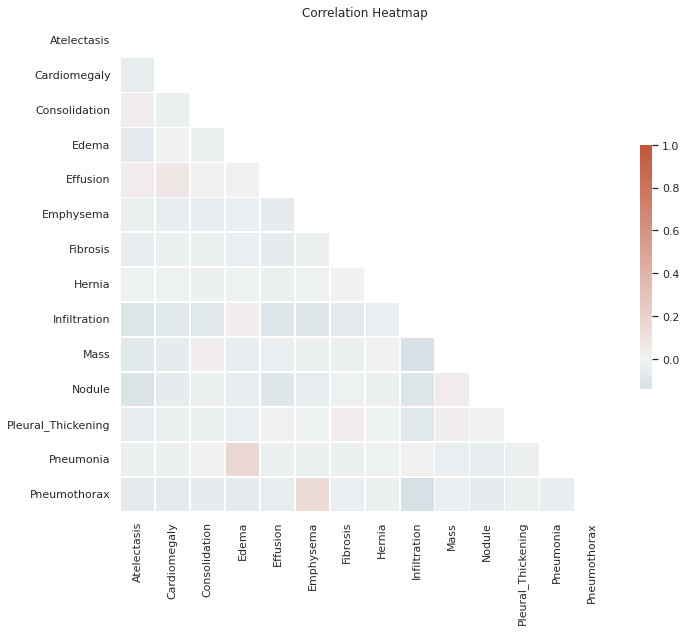

In [ ]:
correlation_df = image_label_map.drop({'Patient ID'}, axis = 1)

sns.set(style = "white")
# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr  = correlation_df.corr()

# Generate a mask for the upper triangle
mask  = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap  = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

To test the availability of file path, here we visualize a sample image below.

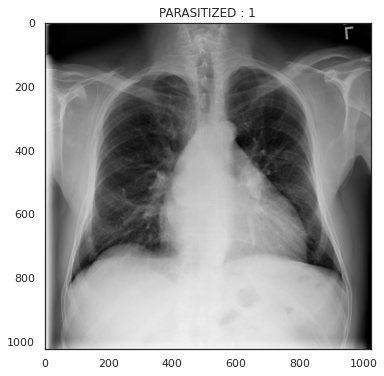

1024 1024 3


In [ ]:
#visualize one image
import cv2
plt.figure(figsize = (6,6))

img = cv2.imread('/content/images_001/images/00000001_000.png')
plt.imshow(img)
plt.title('PARASITIZED : 1')
plt.show()

height, width,channels = img.shape[:3]
print("Height, width, channels:",height, width,channels)

# Step 2. Models


Our project is mainly focus on realizing image classification, so we firstly consider to build a CNN model (Convolutional Neural Networks) to achieve the classification. 


Since our whole dataset is too large to run on colab or even download here, we pick out 5 sub-datasets and train them seperatedy on AWS. This can be done by changeing image path before each training.



## 2.1 Train test split

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train set and test set
x_train, x_test= train_test_split(image_label_map , test_size = 0.2, random_state = 101)
x_train

,Index,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
15874,00009925_043.png,9925,0,0,0,0,0,0,0,0,0,0,0,0,0,1
26006,00014710_005.png,14710,1,0,0,0,0,0,0,0,0,0,1,0,1,0
46725,00027066_005.png,27066,0,0,0,0,0,0,0,0,0,0,1,0,0,1
30245,00016896_008.png,16896,0,0,0,0,0,0,0,0,0,0,1,0,0,0
50113,00029479_005.png,29479,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,00003527_001.png,3527,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8006,00005094_009.png,5094,0,0,1,0,0,0,0,0,0,0,0,0,0,0
17745,00010801_000.png,10801,0,0,0,0,0,0,0,0,0,0,1,0,0,0
17931,00010866_003.png,10866,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 2.2 Get image generators with data augmentation

Here we use ImageDataGenerator to get the images with their labels. Since the datasets has class imbalance problems and it's hard to resample for images, here we do **data augmentaion** to mitigate **overfitting.**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#target image size
IMAGE_SIZE=[512, 512]# original :1024
EPOCHS = 20
#bach size is 64 for cnn, 8 for densenet.
BATCH_SIZE = 64  

def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 512, target_h = 512):#320

  print("\n getting train generator...")
   
  image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True, 

        # data augmentation:
        shear_range=0.1,
        zoom_range=0.15,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.05,
        horizontal_flip=True, 
        vertical_flip = False, 
        fill_mode = 'reflect')
  
  generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
  return generator



def get_test_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):

  print("\n getting test generator...")
   
  image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True, 
        )
  generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
  return generator

In [ ]:

# images file path
IMAGE_DIR='/content/images_001/images'
#IMAGE_DIR='/content/images_004/images'
#IMAGE_DIR='/content/images_007/images'
#IMAGE_DIR='/content/images_0010/images'
#IMAGE_DIR='/content/images_0012/images'

train_generator = get_train_generator(df = x_train,#labels
                                      image_dir = IMAGE_DIR, # images
                                      x_col = "Index",#column name of filepaths
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


test_generator = get_test_generator(df = x_test,# original:image_label_map,
                                      image_dir = IMAGE_DIR, # original:None
                                      x_col = 'Index',#FilePath
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


 getting train generator...
Found 290 validated image filenames.

 getting test generator...
Found 70 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 41117 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10282 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


To test the usability of generator, here we visualize a batch of **augmented images** together with all their corresponding labels in below cells.

These images are shown in another notebook used for AWS.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

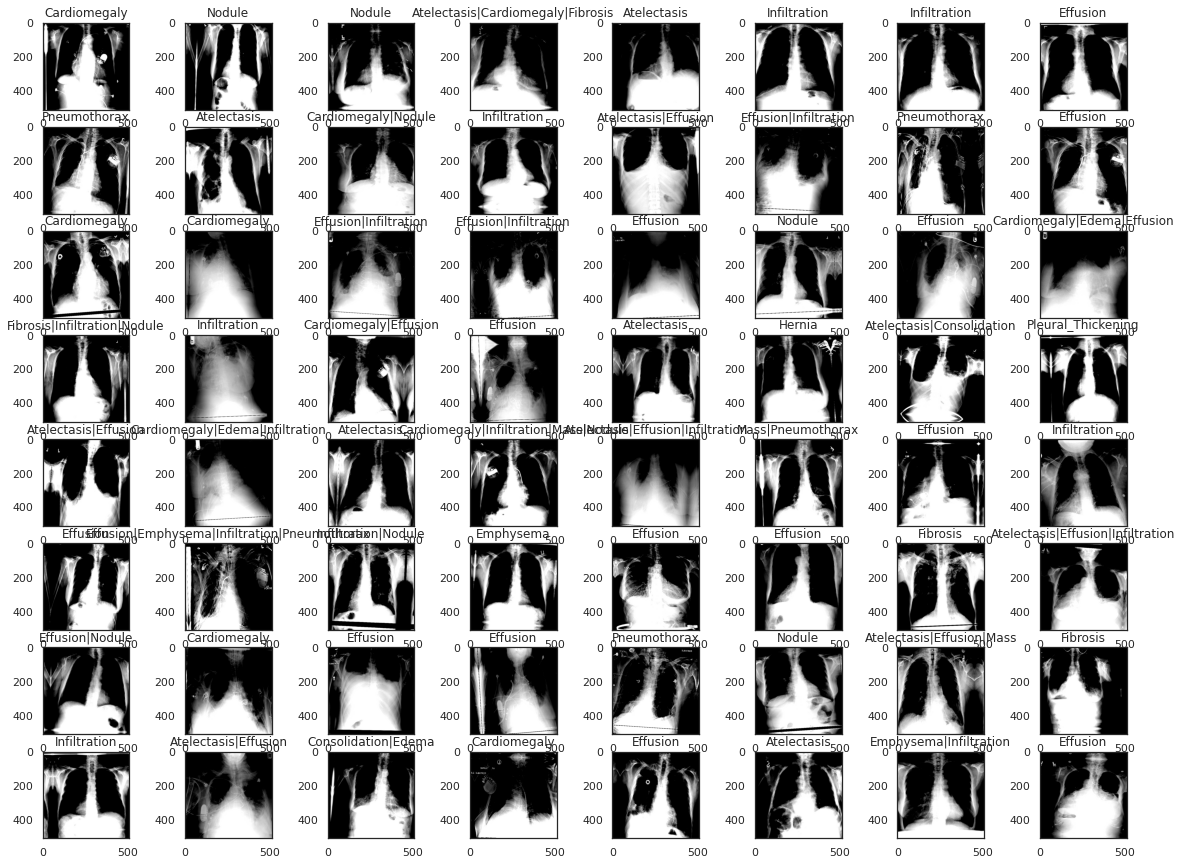

In [ ]:
#augmented images
X, Y = next(train_generator)

def get_label(y):
    ret_labels = []
    for idx in range(len(y)):
        if y[idx]: ret_labels.append(labels[idx])
    if len(ret_labels):  return '|'.join(ret_labels)
    else: return 'No Label'


rows = int(np.floor(np.sqrt(X.shape[0])))
# print(X.shape)
cols = int(X.shape[0]//rows)
fig = plt.figure(figsize=(20,15))
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(X[i-1], cmap='gray')
    plt.title(get_label(Y[i-1]))
    plt.axis(True)
    fig.add_subplot

## 2.3 Build CNN Model

Here we are going to use Keras to build and train the CNN model.

In [ ]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from keras import optimizers

In [ ]:
print(keras.__version__)


2.8.0


### 2.3.1 Build CNN model and compile

We desiged  a CNN model that has 4 convolutional layers and 2 fully connected layers with dropout. Input size of image is 512*512*3, output feature map is 14 possibilites. Kernel size is 3*3 and activation function is Relu.

In [ ]:
#for 512*512 image
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
        #defalt: stride=1, padding=0"same"
    model.add(Conv2D(16, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

# 30*30*64


    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))#512
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation = 'sigmoid'))
    
    return model

Using `CNNbuild` function to build CNN model, and print the model summary for the fully connected network.

In [ ]:
height = 512
width = 512
classes = 14
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 255, 255, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 255, 255, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0

In [ ]:
#useless
from keras import backend as K
def compute_class_freqs(labels):
    positive_frequencies = np.sum(labels, axis=0) / labels.shape[0]
    negative_frequencies = 1 - positive_frequencies
    return positive_frequencies, negative_frequencies
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

pos_weights = freq_neg
neg_weights = freq_pos
#pos_contribution = freq_pos * pos_weights
#neg_contribution = freq_neg * neg_weights

print(pos_weights)


def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
 
  def weighted_loss(y_true, y_pred):
      loss = 0.0
      for i in range(len(pos_weights)):
      # for each class, add average weighted loss for that class
        loss += -(K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon) + \
              neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon), axis=0))
      return loss
  return weighted_loss
weighted_loss=get_weighted_loss(pos_weights, neg_weights)  #function


[0.8627451  0.7254902  0.94117647 0.83333333 0.76470588 0.87254902
 0.96078431 0.95098039 0.55882353 0.88235294 0.95098039 0.92156863
 0.99019608 0.85294118]


Here compile the model. We use 'Adam' as optimizer, and get AUC value. Because the task is a multi-labels task, it's proper to use "binary_crossentropy" instead of 'categorical_crossentropy'. We use 'BinaryAccuracy' as metric rather than "Accuracy" becauase the traditional 'Accuracy' compares output probabilities with labels without comparing to a threshold value and leads to really low 'Accuracy'.



In [ ]:
model.compile(loss = "binary_crossentropy" ,optimizer = 'Adam', 
              metrics = [keras.metrics.BinaryAccuracy(),'AUC'])


### 2.3.2 Train and test

Directly load the updated model if running on different datasets. Do not run this cell for the first train.

In [ ]:
#do not run this cell in the first run
model = keras.models.load_model('/content/cnn_model.h5')

The hyperperamter "steps_per_epoch" is calculated by: (# 𝑠𝑡𝑒𝑝𝑠 𝑝𝑒𝑟 𝑒𝑝𝑜𝑐ℎ ) × 𝑏𝑎𝑡𝑐ℎ 𝑠𝑖𝑧𝑒 = # 𝑡𝑜𝑡𝑜𝑙 𝑡𝑟𝑎𝑖𝑛𝑖𝑛𝑔 𝑠𝑎𝑚𝑝𝑙𝑒s
Because we trained the model four times based on 5 subdatasets, each time the "steps_per_epoch" is different.

In [ ]:

h = model.fit(train_generator, 
                      #how many samples for each epoch= number of gradient descent
                      steps_per_epoch=18,#25
                      epochs=15)  

Epoch 1/10
18/18 [==============================] - 65s 3s/step - loss: 0.8441 - binary_accuracy: 0.5388 - auc: 0.5868


Save model to .h5 file for later use.

In [ ]:
model.save('/content/cnn_model.h5')

Visualize traing loss and accuracy.

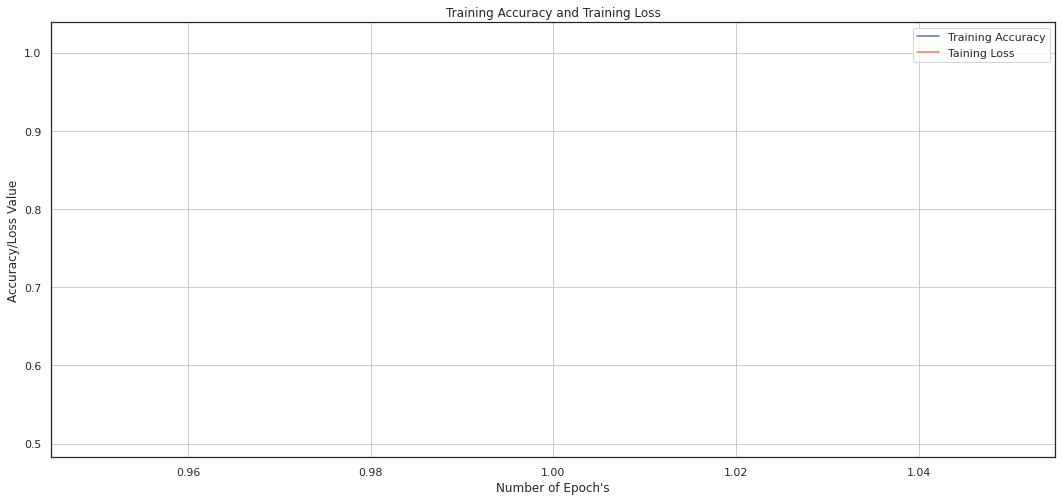

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(1,len(h.history['binary_accuracy'])+1), h.history['binary_accuracy'], label = 'Training Accuracy')
plt.plot(range(1,len(h.history['loss'])+1), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")
plt.grid(True)

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_generator)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

2/2 [==============================] - 3s 736ms/step - loss: 0.6817 - binary_accuracy: 0.5332 - auc: 0.5571
Test Accuracy: 53.32%
7/7 [==============================] - 15s 2s/step - loss: 0.7059 - binary_accuracy: 0.5280 - auc: 0.4884
Train Accuracy: 52.80%


Test. First get predicted probability and than compare them with thresholds to get predicted labels.

In [ ]:
#predicted probabilitys
predicted_vals = model.predict(test_generator, steps = len(test_generator))

In [ ]:
#find best threshold
from sklearn.metrics import matthews_corrcoef
threshold = np.arange(0.1,0.9,0.1)
out=predicted_vals
y_test=test_generator.labels
acc = []
accuracies = []
best_threshold = np.zeros(out.shape[1])
for i in range(out.shape[1]):
    y_prob = np.array(out[:,i])
    for j in threshold:
        y_pred = [1 if prob>=j else 0 for prob in y_prob]
        acc.append( matthews_corrcoef(y_test[:,i],y_pred))
    acc   = np.array(acc)
    index = np.where(acc==acc.max()) 
    accuracies.append(acc.max()) 
    best_threshold[i] = threshold[index[0][0]]
    acc = []


In [ ]:
#predicted labels
y_pred = np.array([[1 if out[i,j]>=best_threshold[j] else 0 for j in range(y_test.shape[1])] for i in range(len(y_test))])

In [ ]:
#test hamming loss
from sklearn.metrics import hamming_loss
hamming_loss(y_test,y_pred)

0.4857142857142857

### 2.3.3 Confusion matrix

Although we have done data augmentation, we can see from the below confusion matrix that data has class-imbalance problem.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
matrix = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
pd.DataFrame(classification_report(y_test,y_pred, output_dict=True))
sns.set(rc = {'figure.figsize':(15,15)})
confusion_matrix_df = pd.DataFrame(matrix)
sns.heatmap(confusion_matrix_df, annot=True,cmap="Blues")

NameError: ignored

## 2.4 Use pretrained network

Here we use another network, DenseNet121, combing transfer learning with deep learning.

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras import backend as K
from keras.models import Sequential, Model
 

In [ ]:
#transfer learning 
base_model = DenseNet121(include_top=False) 
layers = base_model.layers
print(f"The model has {len(layers)} layers")
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")
base_model.summary()


x = base_model.output #16*16*1024, output of base model
x = GlobalAveragePooling2D()(x) # pass through pooling layser,
predictions = Dense(len(labels), activation="sigmoid")(x) #pass through fc layer, get final output

new_modell = Model(inputs=base_model.input, outputs=predictions)
new_modell.compile(optimizer='adam', loss= "binary_crossentropy",
                  metrics=[keras.metrics.BinaryAccuracy(),'AUC'])



The model has 427 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 1024), dtype=tf.float32, name=None), name='relu/Relu:0', description="created by layer 'relu'")
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, None, None,   0          ['input_2[0][0]']                
 D)               

In [ ]:
BATCH_SIZE=8
train_generator = get_train_generator(df = x_train,#labels
                                      image_dir = IMAGE_DIR, # images
                                      x_col = "Index",#column name of filepaths
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


test_generator = get_test_generator(df = x_test,# original:image_label_map,
                                      image_dir = IMAGE_DIR, # original:None
                                      x_col = 'Index',#FilePath
                                      y_cols = labels, 
                                      batch_size=BATCH_SIZE,
                                      target_w = IMAGE_SIZE[0], 
                                      target_h = IMAGE_SIZE[1] 
                                      )


 getting train generator...
Found 290 validated image filenames.

 getting test generator...
Found 70 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 41117 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10282 invalid image filename(s) in x_col="Index". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
hh = new_modell.fit(train_generator, 
                      steps_per_epoch=36, 
                      epochs=5) #15
#converge obviously faster 

Epoch 1/5
36/36 [==============================] - 66s 1000ms/step - loss: 0.3587 - binary_accuracy: 0.8640 - auc: 0.6954
Epoch 2/5
36/36 [==============================] - 36s 983ms/step - loss: 0.3167 - binary_accuracy: 0.8789 - auc: 0.7687
Epoch 3/5
36/36 [==============================] - 36s 982ms/step - loss: 0.3134 - binary_accuracy: 0.8807 - auc: 0.7818
Epoch 4/5
36/36 [==============================] - 36s 980ms/step - loss: 0.3051 - binary_accuracy: 0.8810 - auc: 0.7926
Epoch 5/5
36/36 [==============================] - 36s 983ms/step - loss: 0.3037 - binary_accuracy: 0.8820 - auc: 0.7930


Here are the codes for visualizaing training process. Because we trained this model on AWS, so nothing show up here. 
In comparison, the loss converges to 0.3 just in the second epoch, which is apparently faster than peformance of cnn model.

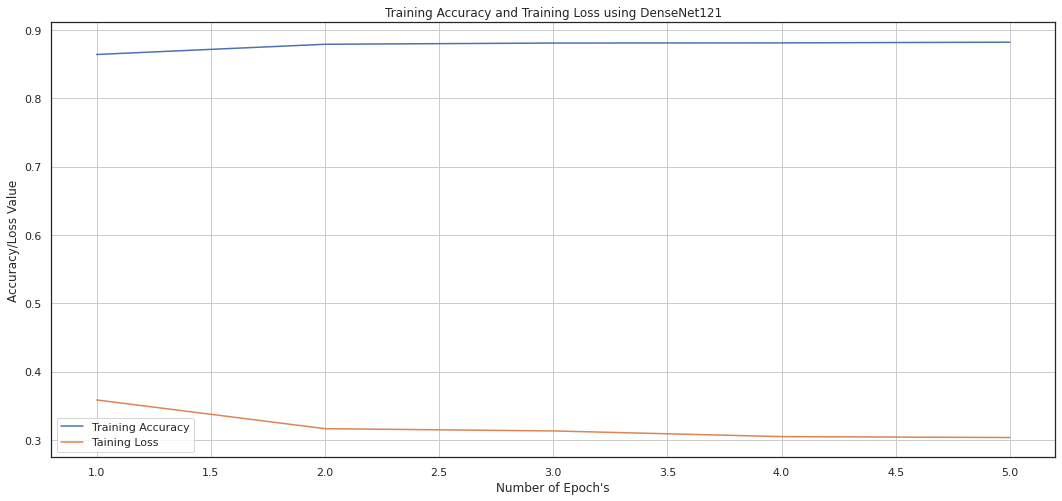

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(range(1,len(hh.history['binary_accuracy'])+1), hh.history['binary_accuracy'], label = 'Training Accuracy')
plt.plot(range(1,len(hh.history['loss'])+1), hh.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss using DenseNet121')
plt.legend(loc = "best")
plt.grid(True)



# Step 3. EDA (Exploratory Data Analysis)


 For EDA, rather than use seanborn or matlib, we have tried to use on new visulization tool box called bokeh which is a Python library for creating interactive visualizations for modern web browsers. It helps you build beautiful graphics, ranging from simple plots to complex dashboards with streaming datasets.



##3.1 Check ratio of illness people versus healthy people.

In [ ]:
import bokeh
import IPython.display as ipd
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.models.tools import HoverTool
from bokeh.palettes import BuGn4, cividis
from bokeh.plotting import figure, output_notebook, show, output_file
from bokeh.transform import cumsum
from bokeh.palettes import Category20c

output_notebook()
diagnosis = ['Health', 'ill' ]
counts = [(train_df['Finding Labels'] == 'No Finding').sum(), train_df.shape[0]- (train_df['Finding Labels'] == 'No Finding').sum()]
source = ColumnDataSource(pd.DataFrame({'Type':diagnosis,'Counts':counts, 'color':['#deebf7', '#084594']}))


tooltips = [
    ("Category", "@Type"),
    ("No of Samples", "@Counts")
]

normal_vs_sick = figure(x_range=diagnosis, y_range=(0,70000), plot_height=500, plot_width = 500, title="health vs illness Distribution", tooltips = tooltips)
normal_vs_sick.vbar(x='Type', top='Counts', width=1, legend_field="Type", color = 'color', source=source)
normal_vs_sick.xgrid.grid_line_color = 'blue'
normal_vs_sick.legend.orientation = "vertical"
normal_vs_sick.legend.location = "top_right"
show(normal_vs_sick)





##3.2 boxplot of 14 different diagnosis distribution versus the ID of patients

In [ ]:
all_labels_df = all_labels_df.explode('Finding Labels')

groups = all_labels_df.groupby('Finding Labels')
q1 = groups.quantile(q=0.25)
q2 = groups.quantile(q=0.5)
q3 = groups.quantile(q=0.75)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr
def outliers(group):
    cat = group.name
    return group[(group["Patient ID"] > upper.loc[cat]['Patient ID']) | (group["Patient ID"] < lower.loc[cat]['Patient ID'])]['Patient ID']
out = groups.apply(outliers).dropna()

# prepare outlier data for plotting, we need coordinates for every outlier.
if not out.empty:
    outx = list(out.index.get_level_values(0))
    outy = list(out.values)

p = figure(tools="", background_fill_color="#efefef", x_range=list(mlb.classes_), toolbar_location=None,plot_height=400, plot_width = 1200,title="Diagnosis distrbution on Patient ID")

# if no outliers, shrink lengths of stems to be no longer than the minimums or maximums
qmin = groups.quantile(q=0.00)
qmax = groups.quantile(q=1.00)
upper['Patient ID'] = [min([x,y]) for (x,y) in zip(list(qmax.loc[:,'Patient ID']),upper['Patient ID'])]
lower['Patient ID'] = [max([x,y]) for (x,y) in zip(list(qmin.loc[:,'Patient ID']),lower['Patient ID'])]

# stems
p.segment(list(mlb.classes_), upper['Patient ID'], list(mlb.classes_), q3['Patient ID'], line_color="black")
p.segment(list(mlb.classes_), lower['Patient ID'], list(mlb.classes_), q1['Patient ID'], line_color="black")

# boxes
p.vbar(list(mlb.classes_), 0.7, q2['Patient ID'], q3['Patient ID'], fill_color="#E08E79", line_color="black")
p.vbar(list(mlb.classes_), 0.7, q1['Patient ID'], q2['Patient ID'], fill_color="#3B8686", line_color="black")

# whiskers (almost-0 height rects simpler than segments)
p.rect(list(mlb.classes_), lower['Patient ID'], 0.2, 0.01, line_color="black")
p.rect(list(mlb.classes_), upper['Patient ID'], 0.2, 0.01, line_color="black")

# outliers
if not out.empty:
    p.circle(outx, outy, size=10, color="#F38630", fill_alpha=0.6)

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 2
p.xaxis.major_label_text_font_size="12px"

show(p)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Dropping invalid colum

### 3.3 check percentage of different diagnosis in the dataset using bar chart and pie chart.

In [ ]:
def plot_pie_bokeh(data = None):
    from math import pi
    from bokeh.palettes import Category20c
    x = data.to_dict()

    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'category'})
    data['angle'] = data['value']/data['value'].sum() * 2*pi
    data['color'] = Category20c[len(x)]
    p = figure(plot_height=400, plot_width = 700, title="Pie Chart", tooltips="@category: @value%", x_range=(-0.5, 1.0))
    p.wedge(x=0.38, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="black", fill_color='color', legend_field='category', source=data)
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None

    p.legend.orientation = "vertical"
    p.legend.location = "top_left"
    
    return p
    

data = image_label_map[labels].sum(axis=0).sort_values(ascending = True)

# bokeh packages

diagnosis = data.index.tolist()
source = ColumnDataSource(data=dict(diagnosis=data.index.tolist(), counts=data.tolist(), color = Category20c[len(data)]))

tooltips = [("Diagnosis", "@diagnosis"), ("Count", "@counts") ]
diag_dist = figure(x_range=diagnosis, y_range=(0,25000), plot_height=400, plot_width = 1200, title="Diagnosis Distributions", tooltips = tooltips)
diag_dist.vbar(x='diagnosis', top='counts', width=0.65, color='color', legend_field="diagnosis", source=source)

diag_dist.xgrid.grid_line_color = '#444444'
diag_dist.legend.orientation = "horizontal"
diag_dist.legend.location = "top_left"


dist_diag_percent = plot_pie_bokeh(data/data.sum()*100)

show(column(diag_dist, dist_diag_percent))





In [ ]:
train_df.rename(columns={"Patient Age": "PatientAge"}, inplace = True)
train_df[train_df['PatientAge'] > 100]


average_age = int(train_df[train_df['PatientAge'] < 100]['PatientAge'].mean())
for idx in range(train_df.shape[0]):
    if train_df.iloc[idx, 4] > 100:
        print(f'{train_df.iloc[idx, 0]} : age {train_df.iloc[idx, 4]} is changed to ->> {average_age}')
        train_df.iloc[idx, 4] = average_age

train_df[train_df['PatientAge'] > 80]# 100


,Index,Finding Labels,Follow-up #,Patient ID,PatientAge,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
11,00000003_000.png,Hernia,7,3,81,F,PA,2582,2991,0.143000,0.143000
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168000,0.168000
21,00000006_000.png,No Finding,0,6,81,M,PA,2500,2048,0.168000,0.168000
22,00000007_000.png,No Finding,0,7,82,M,PA,2500,2048,0.168000,0.168000
27,00000010_000.png,Infiltration,0,10,84,F,PA,2992,2991,0.143000,0.143000
...,...,...,...,...,...,...,...,...,...,...,...
111613,00030561_017.png,Effusion,17,30561,82,F,PA,2021,2021,0.194311,0.194311
111614,00030561_018.png,Effusion,18,30561,82,F,PA,2021,2021,0.194311,0.194311
111615,00030561_019.png,No Finding,19,30561,82,F,PA,1798,1769,0.194311,0.194311
111616,00030561_020.png,No Finding,20,30561,82,F,PA,2021,2021,0.194311,0.194311


check the table for people whose age is larger than 80.

In [ ]:
def hist_hover(data, column=None,  title = 'Histogram',  colors=["SteelBlue", "Tan"], bins=30, log_scale=False, show_plot=True):

    # build histogram data with Numpy
    hist, edges = np.histogram(data, bins = bins)

    hist_df = pd.DataFrame({column: hist, "left": edges[:-1], "right": edges[1:]})
    hist_df["interval"] = ["%d to %d" % (left, right) for left, 
                           right in zip(hist_df["left"], hist_df["right"])]


                           # bokeh histogram with hover tool
    if log_scale == True:
        hist_df["log"] = np.log(hist_df[column])
        src = ColumnDataSource(hist_df)
        plot = figure(plot_height = 300, plot_width = 600,
              title = title,
              x_axis_label = column.capitalize(),
              y_axis_label = "Log Count")    
        plot.quad(bottom = 0, top = "log",left = "left", 
            right = "right", source = src, fill_color = colors[0], 
            line_color = "black", fill_alpha = 0.7,
            hover_fill_alpha = 1.0, hover_fill_color = colors[1])
    else:
        src = ColumnDataSource(hist_df)
        plot = figure(plot_height = 300, plot_width = 600,
            title = title,
              x_axis_label = column.capitalize(),
              y_axis_label = "Count")    
        plot.quad(bottom = 0, top = column,left = "left", 
            right = "right", source = src, fill_color = colors[0], 
            line_color = "black", fill_alpha = 0.7,
            hover_fill_alpha = 1.0, hover_fill_color = colors[1])
        
    hover = HoverTool(tooltips = [(' Age Interval', '@interval'),
                              ('Sample Count', str("@" +str(column)))])
    plot.add_tools(hover)
    # output
    if show_plot == True:
        show(plot)
    else:
        return plot

## 3.4 bokh automatical operation on count the number of people in different ages.

In [ ]:
hist_hover(train_df['PatientAge'], column = 'PatientAge', bins = 100)

##3.5 check the histogram of male people and female people separetely.

In [ ]:
ages_male = train_df.loc[(train_df["Patient Gender"] == 'M'), "PatientAge"].tolist()
ages_female = train_df.loc[(train_df["Patient Gender"] == 'F'), "PatientAge"].tolist()

In [ ]:
show(column(hist_hover(ages_male, column = 'MaleAges', title = 'Male Patients Age Histogram', bins = 95, show_plot=False),
            hist_hover(ages_female, column = 'FemaleAges', title = 'Female Patients Age Histogram',  bins = 95, show_plot=False)))

In [ ]:
train_df.PatientAge.max() - train_df.PatientAge.min()

95

## 3.6 bounding box analysis on images.

In [ ]:
bbox= pd.read_csv('/content/BBox_List_2017.csv')
bbox.rename(columns={"Bbox [x": "x","h]":"h"}, inplace = True)
def get_bbox_area(row):
    return (row['w'])*(row['h'])
bbox['bbox_area'] = bbox.apply(get_bbox_area, axis=1)
bbox.drop(columns = {"Unnamed: 6","Unnamed: 7","Unnamed: 8"},inplace = True)
bbox.replace("00013118_008.png", "00000001_000.png")




,Image Index,Finding Label,x,y,w,h,bbox_area
0,00000001_000.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,6871.772479
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,58150.021258
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,33652.858374
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,7801.344441
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,15673.289285
...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,198898.038202
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,6596.967032
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,25679.755694
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,25327.641284


 install pydicom

In [ ]:
pip install pydicom

     |████████████████████████████████| 2.0 MB 5.4 MB/s 


##3.7 Seaborn pairwise Comparsion on postion of diagnosis on images 

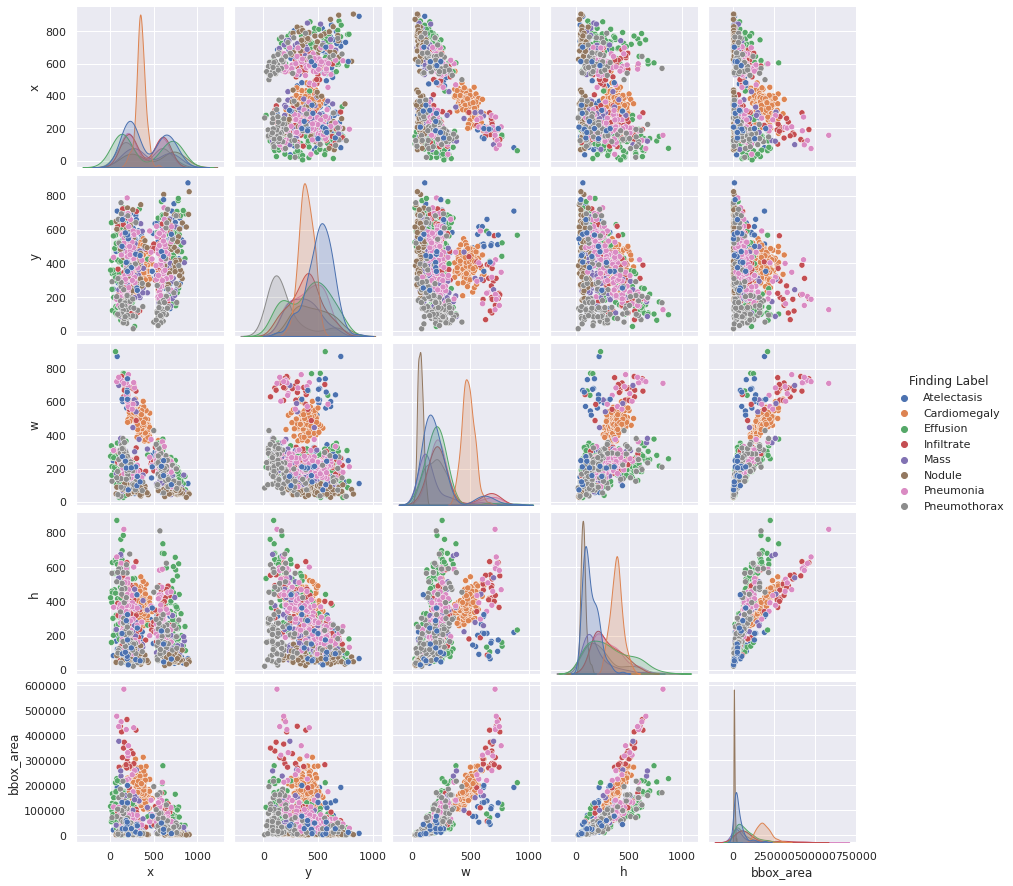

In [ ]:
sns.pairplot(bbox, hue='Finding Label');

## 3.8 display each bounding box on images

In [ ]:
import pydicom
from glob import glob
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import pydicom.uid
import warnings
warnings.filterwarnings('ignore')
def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path,force = True)
    
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data
def plot_imgs(imgs, cols=4, size=7, is_rgb=True, title="", cmap='gray', img_size=(500,500)):
    rows = len(imgs)//cols + 1
    fig = plt.figure(figsize=(cols*size, rows*size))
    for i, img in enumerate(imgs):
        if img_size is not None:
            img = cv2.resize(img, img_size)
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img, cmap=cmap)
    plt.suptitle(title)
    plt.show()

import random
from random import randint
imgs = []
img_ids = bbox['Image Index'].values
class_ids = bbox['Finding Label'].unique()

# map label_id to specify color
label2color = {class_id:[randint(0,255) for i in range(3)] for class_id in class_ids}
thickness = 3
scale = 5



for i in range(8):
    img_id = random.choice(img_ids)
    img_path = f'/content/images_001/images/00000001_000.png'
    img = dicom2array(path=img_path)
    img = cv2.resize(img, None, fx=1/scale, fy=1/scale)
    img = np.stack([img, img, img], axis=-1)
    
    boxes = bbox.loc[bbox['image_id'] == img_id, ['x', 'y', 'w', 'h']].values/scale
    labels = bbox.loc[bbox['image_id'] == img_id, ['class_id']].values.squeeze()
    
    for label_id, box in zip(labels, boxes):
        color = label2color[label_id]
        img = cv2.rectangle(
            img,
            (int(box[0]), int(box[1])),
            (int(box[2]), int(box[3])),
            color, thickness
    )
    img = cv2.resize(img, (500,500))
    imgs.append(img)
    
plot_imgs(imgs, cmap=None)

AttributeError: ignored